In [4]:
import tensorflow as tf
from utils import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

raw_model = tf.keras.applications.EfficientNetB0(
include_top=True, weights='imagenet', input_tensor=None,
input_shape=None, pooling=None, classes=1000,
classifier_activation='softmax')
export_dropout_effnet()
dropout_model = tf.keras.models.load_model("models/dropout_effnetb0.h5")
layer_name = [i.name for i in raw_model.layers if "activation" in i.name][-1]

current layer: 1 rescaling_3
current layer: 2 normalization_3
current layer: 3 stem_conv_pad
current layer: 4 stem_conv
current layer: 5 stem_bn
current layer: 6 stem_activation
current layer: 7 block1a_dwconv
current layer: 8 block1a_bn
current layer: 9 block1a_activation
current layer: 10 block1a_se_squeeze
current layer: 11 block1a_se_reshape
current layer: 12 block1a_se_reduce
current layer: 13 block1a_se_expand
current layer: 14 block1a_se_excite
current layer: 15 block1a_project_conv
current layer: 16 block1a_project_bn
current layer: 17 block2a_expand_conv
current layer: 18 block2a_expand_bn
current layer: 19 block2a_expand_activation
current layer: 20 block2a_dwconv_pad
current layer: 21 block2a_dwconv
current layer: 22 block2a_bn
current layer: 23 block2a_activation
current layer: 24 block2a_se_squeeze
current layer: 25 block2a_se_reshape
current layer: 26 block2a_se_reduce
current layer: 27 block2a_se_expand
current layer: 28 block2a_se_excite
current layer: 29 block2a_projec

In [5]:
# Load and preprocess a sample image
input_image = np.load("images/ILSVRC2012_val_00043797.npy")
print("input shape:", input_image.shape)
preprocessed_input = np.expand_dims(tf.keras.applications.efficientnet.preprocess_input(input_image), 0)

input shape: (224, 224, 3)


In [6]:
# Prediction of the raw model
category_index = np.argmax(raw_model(preprocessed_input))
print("Prediction:", category_index)

Prediction: 49


In [7]:
# Raw grad-cam and score-cam
gradcam_image, _ = GradCam(raw_model,
        image = preprocessed_input,
        category_index = category_index,
       layer_name = layer_name,
        raw_array = input_image,
        dimension = 224
       )
# scorecam_image, _ = ScoreCam(raw_model,
#         image = preprocessed_input,
#         category_index = category_index,
#        layer_name = layer_name,
#         raw_array = input_image,
#         dimension = 224
#        )
# MC-dropout grad-cam and score-cam
dropout_gradcam_image, _, dropout_gradcam_std_image = GradCam_Dropout(dropout_model,
        image = preprocessed_input,
        category_index = category_index,
       layer_name = layer_name,
        raw_array = input_image,
        dimension = 224,
        sample = 100
       )
# dropout_scorecam_image, _, dropout_scorecam_std_image= ScoreCam_Dropout(dropout_model,
#         image = preprocessed_input,
#         category_index = category_index,
#        layer_name = layer_name,
#         raw_array = input_image,
#         dimension = 224,
#         sample = 100
#        )

100%|██████████| 100/100 [00:28<00:00,  3.57it/s]


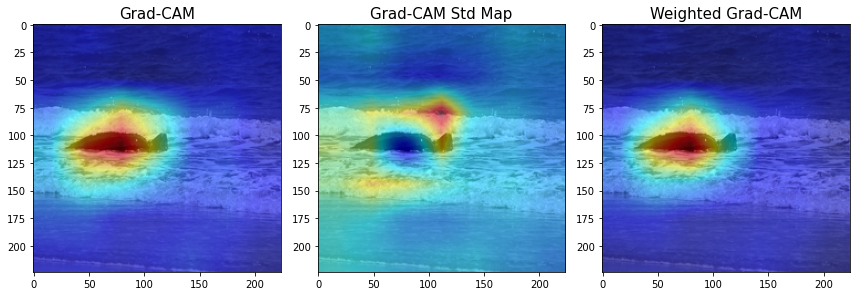

In [8]:
fignum = 3
fig = plt.figure()

ax0 = fig.add_subplot(1, fignum, 1)
ax0.imshow(Image.fromarray(gradcam_image))
ax0.set_title('Grad-CAM', fontsize=15)

ax1 = fig.add_subplot(1, fignum, 2)
ax1.imshow(Image.fromarray(dropout_gradcam_std_image))
ax1.set_title('Grad-CAM Std Map', fontsize=15)

ax2 = fig.add_subplot(1, fignum, 3)
ax2.imshow(Image.fromarray(dropout_gradcam_image))
ax2.set_title('Weighted Grad-CAM', fontsize=15)

# ax0 = fig.add_subplot(2, fignum, 4)
# ax0.imshow(Image.fromarray(scorecam_image))
# ax0.set_title('Score-CAM', fontsize=15)

# ax1 = fig.add_subplot(2, fignum, 5)
# ax1.imshow(Image.fromarray(dropout_scorecam_std_image))
# ax1.set_title('Score-CAM Std Map', fontsize=15)

# ax2 = fig.add_subplot(2, fignum, 6)
# ax2.imshow(Image.fromarray(dropout_scorecam_image))
# ax2.set_title('Weighted Score-CAM', fontsize=15)

fig.set_size_inches(12, 18)
fig.tight_layout()